# Price Volume Trend (PVT)

https://www.incrediblecharts.com/indicators/price_and_volume_trend.php

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2020-08-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03 00:00:00-04:00,108.199997,111.637497,107.892502,108.937500,107.102974,308151200
2020-08-04 00:00:00-04:00,109.132500,110.790001,108.387497,109.665001,107.818214,173071600
2020-08-05 00:00:00-04:00,109.377502,110.392502,108.897499,110.062500,108.209015,121776800
2020-08-06 00:00:00-04:00,110.404999,114.412498,109.797501,113.902496,111.984344,202428800
2020-08-07 00:00:00-04:00,113.205002,113.675003,110.292503,111.112503,109.438293,198045600


In [3]:
df['Momentum_1D'] = (df['Adj Close'] - df['Adj Close'].shift(1)).fillna(0)
df["PVT"] = (df['Momentum_1D']/ df['Adj Close'].shift(1))*df['Volume']
df["PVT"] = df["PVT"] - df["PVT"].shift(1)
df["PVT"] = df["PVT"].fillna(0)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Momentum_1D,PVT
Date,,,,,,,,
2022-12-23 00:00:00-05:00,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,-0.369431,1.672184e+06
2022-12-27 00:00:00-05:00,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,-1.827209,-7.791531e+05
2022-12-28 00:00:00-05:00,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,-3.983917,-1.663982e+06
2022-12-29 00:00:00-05:00,127.989998,130.479996,127.730003,129.610001,129.412415,75703700,3.564560,4.765955e+06
2022-12-30 00:00:00-05:00,128.410004,129.949997,127.430000,129.929993,129.731918,77034200,0.319504,-1.954071e+06


Text(0.5, 0, 'Date')

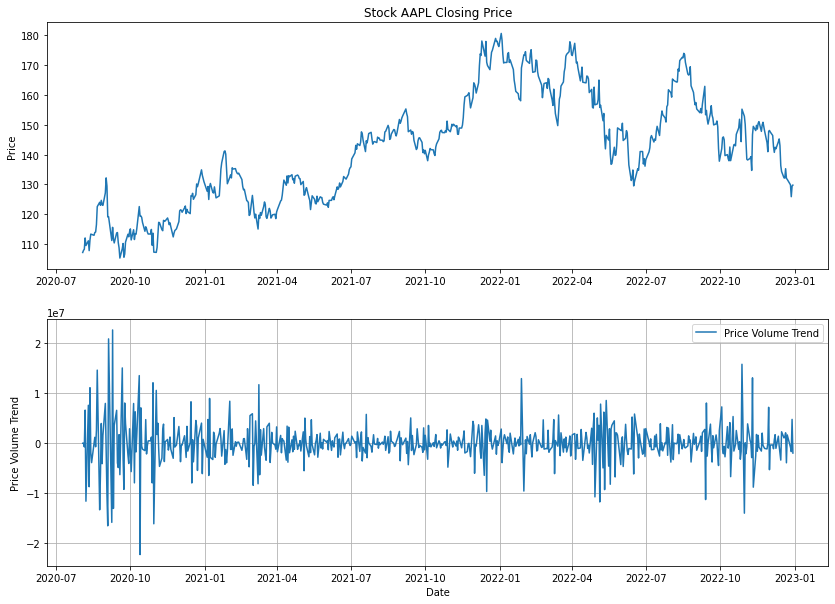

In [4]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['PVT'], label='Price Volume Trend')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Price Volume Trend')
ax2.set_xlabel('Date')

## Candlestick with Price Volume Trend (PVT)

In [5]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Momentum_1D,PVT,VolumePositive
0,18477.166667,108.199997,111.637497,107.892502,108.937500,107.102974,308151200,0.000000,0.000000e+00,False
1,18478.166667,109.132500,110.790001,108.387497,109.665001,107.818214,173071600,0.715240,0.000000e+00,False
2,18479.166667,109.377502,110.392502,108.897499,110.062500,108.209015,121776800,0.390800,-7.143881e+05,False
3,18480.166667,110.404999,114.412498,109.797501,113.902496,111.984344,202428800,3.775330,6.621191e+06,True
4,18481.166667,113.205002,113.675003,110.292503,111.112503,109.438293,198045600,-2.546051,-1.156531e+07,False


Text(0.5, 0, 'Date')

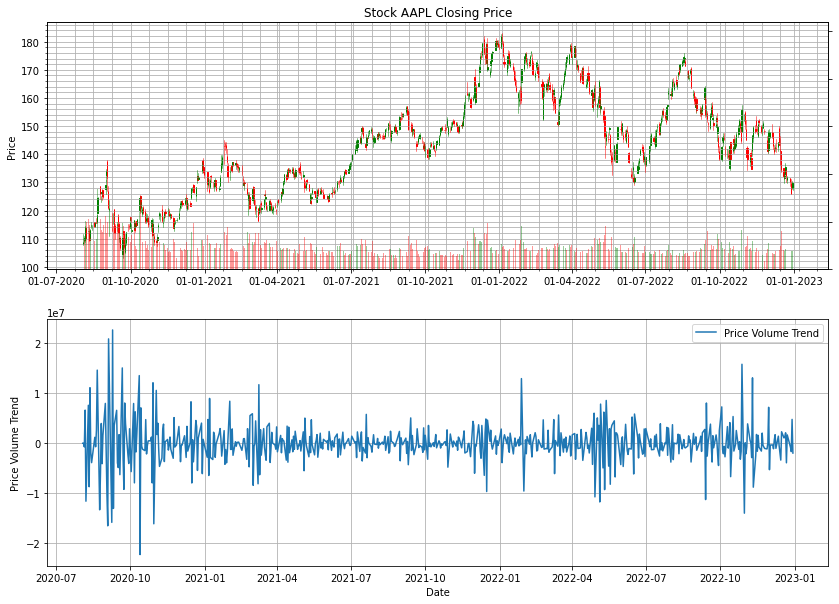

In [7]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['PVT'], label='Price Volume Trend')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Price Volume Trend')
ax2.set_xlabel('Date')